In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA


In [140]:
df = pd.read_csv('merged_Floor2.csv', index_col='Date', parse_dates=True)
df.head(5)

,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,0.0,0.01,0.15,28.36,58.93,0.0,1.08,0.0,0.0,0.0,...,0.32,29.30,68.22,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-07-01 00:01:00,0.0,0.01,0.15,28.36,58.91,0.0,1.07,0.0,0.0,0.0,...,0.32,29.30,68.21,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-07-01 00:02:00,0.0,0.01,0.15,28.36,58.94,0.0,0.88,0.0,0.0,0.0,...,0.28,29.29,68.24,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-07-01 00:03:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,0.0,...,0.32,29.29,68.28,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-07-01 00:04:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,0.0,...,0.32,29.29,68.30,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [141]:
final_df=pd.DataFrame(columns=['lights','acs','plug'])
final_df

,lights,acs,plug


In [142]:
df.columns

Index(['z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)',
       'z1_S1(RH%)', 'z1_S1(lux)', 'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)',
       'z2_AC4(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)',
       'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)',
       'z2_AC13(kW)', 'z2_AC14(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
       'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z3_S1(degC)', 'z3_S1(RH%)', 'z3_S1(lux)', 'z4_AC1(kW)',
       'z4_Light(kW)', 'z4_Plug(kW)', 'z4_S1(degC)', 'z4_S1(RH%)',
       'z4_S1(lux)'],
      dtype='object')

In [143]:
final_df['lights']=df['z1_Light(kW)']+df['z2_Light(kW)']+df['z3_Light(kW)']+df['z4_Light(kW)']
final_df['acs']=df['z1_AC1(kW)']+df['z2_AC1(kW)']+df['z2_AC2(kW)']+df['z2_AC3(kW)']+df['z2_AC4(kW)']+df['z2_AC5(kW)']+df['z2_AC6(kW)']+df['z2_AC7(kW)']+df['z2_AC8(kW)']+df['z2_AC9(kW)']+df['z2_AC10(kW)']+df['z2_AC11(kW)']+df['z2_AC12(kW)']+df['z2_AC13(kW)']+df['z2_AC14(kW)']+df['z4_AC1(kW)']
final_df['plug']=df['z1_Plug(kW)']+df['z2_Plug(kW)']+df['z3_Plug(kW)']+df['z4_Plug(kW)']

In [144]:
final_df['Power_consumption']=final_df['lights']+final_df['acs']+final_df['plug']


In [145]:
final_df=final_df.fillna(final_df.mean())

In [146]:
df1=final_df.resample('D').mean()
df1

,lights,acs,plug,Power_consumption
Date,,,,
2018-07-01,0.091840,7.352958,0.525667,7.970465
2018-07-02,7.355410,34.890465,2.509278,44.755153
2018-07-03,7.417854,32.265833,2.619201,42.302889
2018-07-04,7.618875,31.681694,2.745785,42.046354
2018-07-05,7.505743,33.566118,2.498472,43.570333
...,...,...,...,...
2019-12-27,6.310729,27.680146,2.151625,36.142500
2019-12-28,0.232903,5.852451,0.485222,6.570576
2019-12-29,0.747597,5.970542,0.499299,7.217438


In [147]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Power_consumption'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.626491855128926
p-value: 0.00011540009318146421
Critical Values: {'1%': -3.4426552678216003, '5%': -2.8669676577777548, '10%': -2.569660749624767}


In [156]:
df2 = df1.diff().dropna()
df2

,lights,acs,plug,Power_consumption
Date,,,,
2018-07-02,7.263569,27.537507,1.983611,36.784687
2018-07-03,0.062444,-2.624632,0.109924,-2.452264
2018-07-04,0.201021,-0.584139,0.126583,-0.256535
2018-07-05,-0.113132,1.884424,-0.247313,1.523979
2018-07-06,0.008049,2.645944,-0.002458,2.651535
...,...,...,...,...
2019-12-27,-0.595472,-0.421451,-0.176646,-1.193569
2019-12-28,-6.077826,-21.827694,-1.666403,-29.571924
2019-12-29,0.514694,0.118090,0.014076,0.646861


In [157]:
import statsmodels.api as sm

In [158]:
model = sm.tsa.arima.ARIMA(df1.Power_consumption, order=(1,1,1))
result = model.fit()

In [159]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:      Power_consumption   No. Observations:                  549
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2202.642
Date:                Thu, 27 Apr 2023   AIC                           4411.284
Time:                        15:35:19   BIC                           4424.203
Sample:                    07-01-2018   HQIC                          4416.334
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3192      0.040      8.054      0.000       0.242       0.397
ma.L1         -0.9995      0.080    -12.472      0.000      -1.157      -0.842
sigma2       179.6753     22.011      8.163      0.0

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

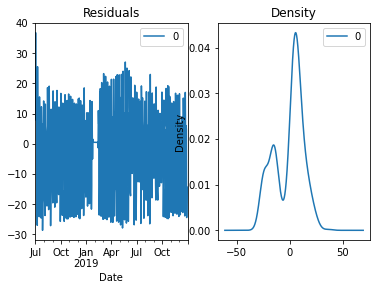

In [160]:
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

In [161]:
forecast = result.forecast(steps=569)
# forecast.values

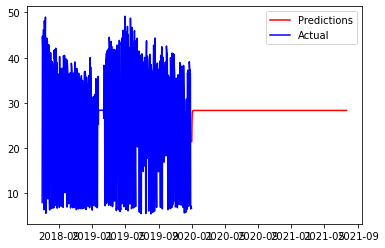

In [162]:
plt.plot(forecast.index, forecast.values, color='red', label='Predictions')
plt.plot(df1.index, df1.Power_consumption, color='blue', label='Actual')
plt.legend()
plt.show()

In [163]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#test['z2_AC1(kW)'].mean()
rmse=sqrt(mean_squared_error(forecast,df1['Power_consumption']))
print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [569, 549]

In [164]:
df1['year'] = df1.index.year
df1['month'] = df1.index.month
df1['day'] = df1.index.day

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [166]:
train_size = int(len(df1) * 0.8)
train_data, test_data = df1[:train_size], df1[train_size:]


In [167]:
X_train = train_data[['year', 'month', 'day']]
y_train = train_data['Power_consumption']
X_test = test_data[['year', 'month', 'day']]
y_test = test_data['Power_consumption']

In [168]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [169]:
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))


Mean squared error: 187.31


In [222]:
new_data = pd.DataFrame({'year': [2020], 'month': [6], 'day': [27]})
y_pred = model1.predict(new_data)
print('Predicted value for new data: {:.2f}'.format(y_pred[0]))

Predicted value for new data: 29.44


# XGBoost

In [191]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [192]:
df3=final_df.resample('D').mean()
df3

,lights,acs,plug,Power_consumption
Date,,,,
2018-07-01,0.091840,7.352958,0.525667,7.970465
2018-07-02,7.355410,34.890465,2.509278,44.755153
2018-07-03,7.417854,32.265833,2.619201,42.302889
2018-07-04,7.618875,31.681694,2.745785,42.046354
2018-07-05,7.505743,33.566118,2.498472,43.570333
...,...,...,...,...
2019-12-27,6.310729,27.680146,2.151625,36.142500
2019-12-28,0.232903,5.852451,0.485222,6.570576
2019-12-29,0.747597,5.970542,0.499299,7.217438


In [193]:
df3.isnull().sum()

lights               0
acs                  0
plug                 0
Power_consumption    0
dtype: int64

In [194]:
split_date =pd.to_datetime( '2019-08-01')
df_train = df3.loc[df3.index <= split_date].copy()
df_train.shape

(397, 4)

In [195]:
df_train

,lights,acs,plug,Power_consumption
Date,,,,
2018-07-01,0.091840,7.352958,0.525667,7.970465
2018-07-02,7.355410,34.890465,2.509278,44.755153
2018-07-03,7.417854,32.265833,2.619201,42.302889
2018-07-04,7.618875,31.681694,2.745785,42.046354
2018-07-05,7.505743,33.566118,2.498472,43.570333
...,...,...,...,...
2019-07-28,1.311285,14.521757,0.719014,16.552056
2019-07-29,1.458868,15.990799,0.758465,18.208132
2019-07-30,5.917222,31.079396,2.386208,39.382826


In [196]:
#df_test = pd.DataFrame(newdf.loc[newdf.index > split_date]
df_test = pd.DataFrame(df3.loc[df3.index > split_date])

df_test.shape

(152, 4)

In [197]:
df_test

,lights,acs,plug,Power_consumption
Date,,,,
2019-08-02,5.929486,29.034236,2.268042,37.231764
2019-08-03,1.157639,12.462514,0.861660,14.481812
2019-08-04,0.280444,4.563729,0.635326,5.479500
2019-08-05,6.122201,30.025044,2.324993,38.465284
2019-08-06,5.944910,29.354819,2.231097,37.530826
...,...,...,...,...
2019-12-27,6.310729,27.680146,2.151625,36.142500
2019-12-28,0.232903,5.852451,0.485222,6.570576
2019-12-29,0.747597,5.970542,0.499299,7.217438


In [198]:
X_tr = df_train[['lights', 'acs', 'plug']]
y_tr = df_train['Power_consumption']
X_te = df_test[['lights', 'acs', 'plug']]
y_te = df_test['Power_consumption']

In [199]:
X_tr

,lights,acs,plug
Date,,,
2018-07-01,0.091840,7.352958,0.525667
2018-07-02,7.355410,34.890465,2.509278
2018-07-03,7.417854,32.265833,2.619201
2018-07-04,7.618875,31.681694,2.745785
2018-07-05,7.505743,33.566118,2.498472
...,...,...,...
2019-07-28,1.311285,14.521757,0.719014
2019-07-29,1.458868,15.990799,0.758465
2019-07-30,5.917222,31.079396,2.386208


In [200]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_tr, y_tr,
        eval_set=[(X_tr, y_tr), (X_te, y_te)],
        early_stopping_rounds=50,
       verbose=False)

C:\Users\yalla\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

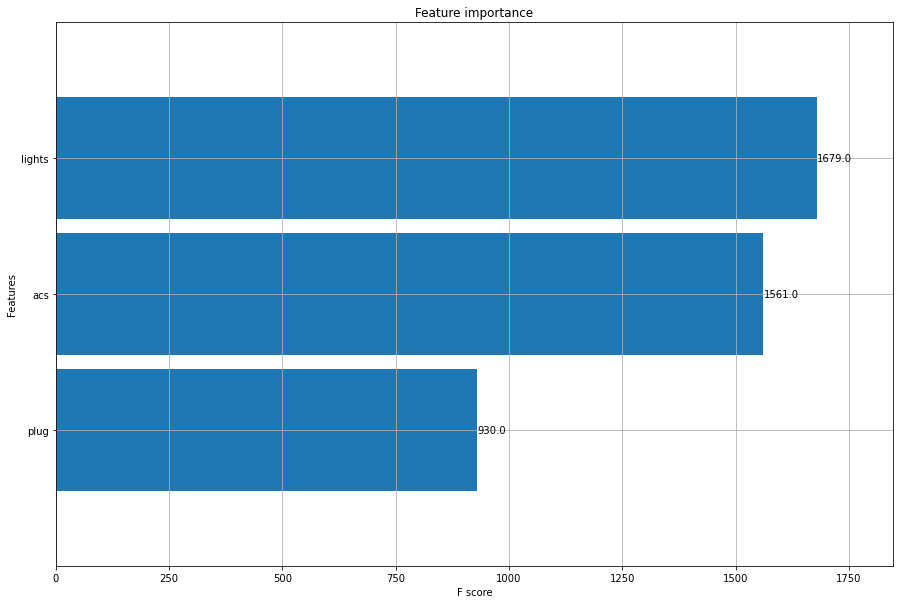

In [201]:
f, ax = plt.subplots(figsize=(15,10))
_ = plot_importance(reg, height=0.9,ax = ax)
plt.show()

In [202]:
df_test['Prediction'] = reg.predict(X_te)
df_all = pd.concat([df_test, df_train], sort=False)

In [203]:
df_test

,lights,acs,plug,Power_consumption,Prediction
Date,,,,,
2019-08-02,5.929486,29.034236,2.268042,37.231764,37.308609
2019-08-03,1.157639,12.462514,0.861660,14.481812,15.875114
2019-08-04,0.280444,4.563729,0.635326,5.479500,5.703195
2019-08-05,6.122201,30.025044,2.324993,38.465284,38.584488
2019-08-06,5.944910,29.354819,2.231097,37.530826,37.643127
...,...,...,...,...,...
2019-12-27,6.310729,27.680146,2.151625,36.142500,36.333904
2019-12-28,0.232903,5.852451,0.485222,6.570576,6.562867
2019-12-29,0.747597,5.970542,0.499299,7.217438,7.208497


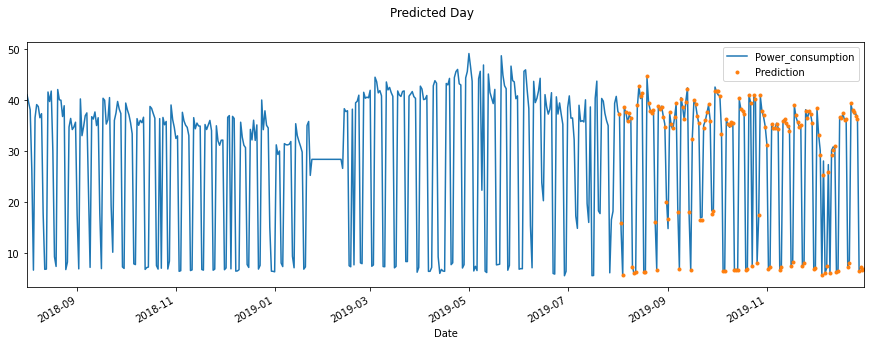

In [204]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Power_consumption','Prediction']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='12-31-2019')
plot = plt.suptitle('Predicted Day')
plt.show()

In [205]:
np.sqrt(mean_squared_error(df_test['Prediction'], df_test['Power_consumption']))


0.4282644887251256

In [206]:
y_pr = reg.predict(X_te)
mse = mean_squared_error(y_te, y_pr)
print('Mean squared error: {:.2f}'.format(mse))


Mean squared error: 0.18


In [221]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_te,y_pr)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.90


# Linear Regression

In [207]:
df1.head()

,lights,acs,plug,Power_consumption,year,month,day
Date,,,,,,,
2018-07-01,0.091840,7.352958,0.525667,7.970465,2018,7,1
2018-07-02,7.355410,34.890465,2.509278,44.755153,2018,7,2
2018-07-03,7.417854,32.265833,2.619201,42.302889,2018,7,3
2018-07-04,7.618875,31.681694,2.745785,42.046354,2018,7,4
2018-07-05,7.505743,33.566118,2.498472,43.570333,2018,7,5


In [208]:
X=df1.iloc[ : , :3]
y=df1.iloc[ : , 3:4]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True,random_state=1)

In [211]:
X_test

,lights,acs,plug
Date,,,
2018-12-08,0.176681,5.819181,0.453257
2019-05-02,5.964207,38.511301,2.117271
2018-09-04,7.391160,23.294445,2.400701
2019-05-21,6.102104,40.304382,2.331285
2018-11-13,5.621840,26.913498,1.869986
...,...,...,...
2019-07-14,0.727889,14.556687,0.725493
2018-07-19,7.372292,31.751326,2.607076
2019-07-24,6.108063,28.955076,2.361813


#from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(X_train,y_train)
y_pred=rg.predict(X_test)
y_pred

Text(0, 0.5, 'predicted\xa0Consumption')

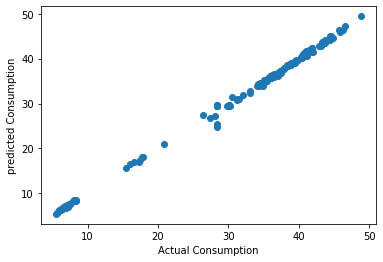

In [213]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual Consumption")
plt.ylabel("predicted Consumption")

<AxesSubplot:xlabel='Power_consumption'>

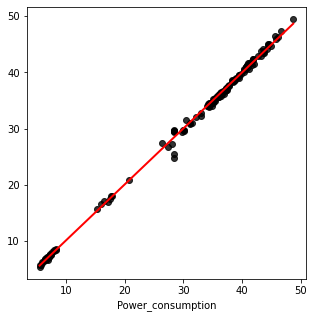

In [214]:
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(5,5)
sns.regplot(x=y_test,y=y_pred,ci=None,color='Black',line_kws={'color':'red','lw':2})

In [220]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.84
